# Segment Classification

After labeling the images and putting them though the copy-script, we can now train a model on the images. There are many possibilities as to how we can represent the image and what type of model we can use to classify those representations. Since the original paper is a bit older, we change the approach to a more modern one. We use a CNN to classify the segments here. The original Paper used classical image processing features to basically do the same thing. If you want to further investigate this approach - Feel free to try different methods :)

In [10]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Data Generators

Classical Keras-based approach to input data from a directory using a Python-Generator.

In [2]:
train_datagen = ImageDataGenerator(
        rotation_range=0,
        width_shift_range=0,
        height_shift_range=0,
        rescale=1./255,
        shear_range=0,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
batch_size = 32

In [5]:
train_generator = train_datagen.flow_from_directory(
        './training_data/train',  
        target_size=(50, 50),  
        batch_size=batch_size,
        class_mode='binary')  

validation_generator = test_datagen.flow_from_directory(
        './training_data/val',
        target_size=(50, 50),
        batch_size=batch_size,
        class_mode='binary')

Found 1400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


##  Simple CNN Model

This is a very simple model, providing a very simple Proof of concept. If this classifier can find any signals, it is possible to use this approach. 

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [16]:
checkpoint = ModelCheckpoint('segment_classification.h5', monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, patience=10)

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=1400 // batch_size,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=600 // batch_size, 
    callbacks=[checkpoint, early_stopping])

Epoch 1/100
43/43 [==============================] - 4s 88ms/step - loss: 0.6484 - acc: 0.6456 - val_loss: 0.6831 - val_acc: 0.6406

Epoch 00001: val_loss improved from inf to 0.68313, saving model to segment_classification.h5
Epoch 2/100
43/43 [==============================] - 4s 89ms/step - loss: 0.6341 - acc: 0.6601 - val_loss: 0.6505 - val_acc: 0.6637

Epoch 00002: val_loss improved from 0.68313 to 0.65047, saving model to segment_classification.h5
Epoch 3/100
43/43 [==============================] - 4s 89ms/step - loss: 0.6100 - acc: 0.6718 - val_loss: 0.6330 - val_acc: 0.6831

Epoch 00003: val_loss improved from 0.65047 to 0.63302, saving model to segment_classification.h5
Epoch 4/100
43/43 [==============================] - 4s 89ms/step - loss: 0.6105 - acc: 0.6759 - val_loss: 0.6738 - val_acc: 0.6056

Epoch 00004: val_loss did not improve from 0.63302
Epoch 5/100
43/43 [==============================] - 4s 92ms/step - loss: 0.5975 - acc: 0.7013 - val_loss: 0.6023 - val_acc: 0.

In [19]:
import matplotlib.pyplot as plt

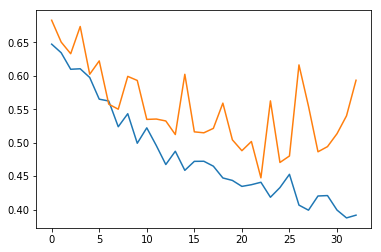

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

What we can see is that the classifier reched about 74% validation accuracy, which shows that it can learn something on the provided data. There are however a lot of improvements that have to be made for this model to work properly. Since we have only two classes, the baseline is 50%. So, the training process is visible, albeit improvable.